In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyautogui
import numpy as np
from PIL import Image
from time import sleep
from glob import glob
import cv2

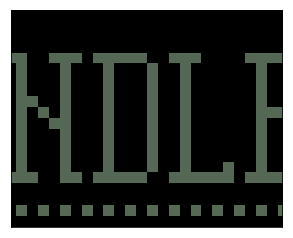

In [105]:
im = pyautogui.screenshot(region=(600, 580, 50, 40))
plt.subplot(1,1,1), plt.title(''), plt.xticks([]), plt.yticks([]), plt.imshow(im);

In [15]:
type(im)

PIL.Image.Image

In [106]:
import os
if not os.path.exists('anchors'): os.mkdir('anchors')
if not os.path.exists('anchors/received-docs'): os.mkdir('anchors/received-docs')
im.save('anchors/endless.png')

In [69]:
def find_origin_coordinates():
    im = pyautogui.screenshot()
    im2 = Image.open('anchors/endless.png')
    result = cv2.matchTemplate(np.array(im2), np.array(im), cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    if max_val < 0.999:
        raise Exception()
    return max_loc

In [70]:
find_origin_coordinates()

(1357, 596)

In [62]:
offset = max_loc[0] - 600, max_loc[1] - 580
def click(x, y):
    global offset
    pyautogui.moveTo(offset[0]+x, offset[1]+y)
    pyautogui.click()

def start_game():
    click(625, 600)
    sleep(2)
    click(343, 201)
    click(543, 461)
    click(637, 631)
    sleep(9)
    
if max_val > 0.999:
    start_game()

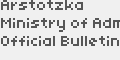

In [5]:
sleep(2)
#pyautogui.position()
im = pyautogui.screenshot(region=(offset[0]+670, offset[1]+276, 120, 60));im

In [54]:
im.save('anchors/bulletin.png')

In [39]:
# screenshot for wanted criminals
def resume():
    click(803, 484)
    pyautogui.press('esc')
    sleep(0.5)

def look_for_wanted_criminals():
    im = pyautogui.screenshot(region=(offset[0]+670, offset[1]+276, 120, 60))
    im2 = Image.open('anchors/bulletin.png')
    if not (np.array(im) == np.array(im2)).all():
        raise Exception()
    pyautogui.move(1,1)
    pyautogui.press('right')
    wanted_criminals = pyautogui.screenshot(region=(offset[0]+64, offset[1]+50, 1140, 640))
    pyautogui.press('left')
    return wanted_criminals

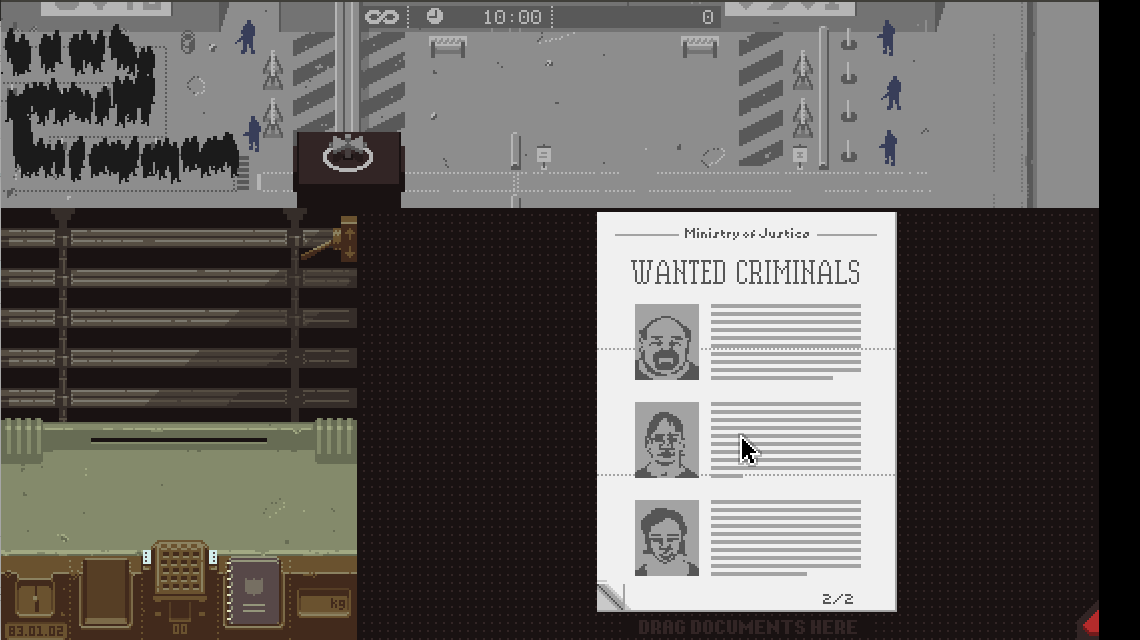

In [40]:
resume()
look_for_wanted_criminals()

In [41]:
# put instructions away
resume()
pyautogui.dragTo(offset[0]+177, offset[1]+638, button='left', duration=0.4)

In [43]:
def call_next():
    click(415, 200)
    sleep(6)

In [44]:
resume()
call_next()

In [45]:
def received_docs():
    return pyautogui.screenshot(region=(offset[0]+67, offset[1]+479, 417-67, 599-479))

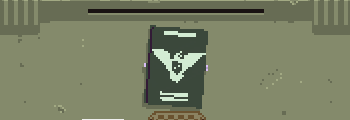

In [46]:
resume()
received_docs()

In [138]:
docs.save('anchors/received-docs/antegria-permit.png')

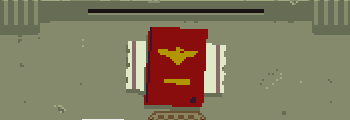

In [140]:
resume()
docs = received_docs()
docs

In [141]:
docs.save('anchors/received-docs/obristan-permit.png')

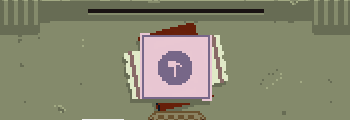

In [142]:
resume()
docs = received_docs()
docs

In [143]:
docs.save('anchors/received-docs/impor-workpass.png')

In [161]:
def received_docs_options():
    return {f.split('/')[-1].split('.')[0]: Image.open(f) for f in glob('anchors/received-docs/*.png')} 
received_docs_options()

{'antegria-permit': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDFEB8>,
 'impor-workpass': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDF8D0>,
 'obristan-permit': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDF9B0>,
 'obristan-workpass': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDFFD0>,
 'republia-permit': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDFE80>}

In [165]:
def received_docs_type(docs=None):
    docs = docs or received_docs()
    for t, val in received_docs_options().items():
        if (np.array(val) == np.array(docs)).all():
            return t
    return None

In [156]:
resume()
received_docs_type()

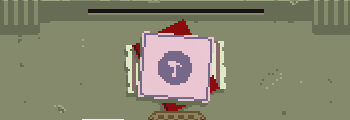

In [155]:
resume()
docs = received_docs()
docs

In [157]:
docs.save('anchors/received-docs/obristan-workpass.png')

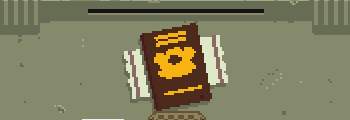

In [158]:
resume()
docs = received_docs()
docs

In [159]:
docs.save('anchors/received-docs/republia-permit.png')

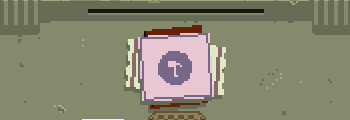

In [167]:
resume()
docs = received_docs()
docs

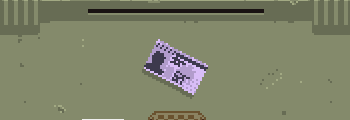

In [169]:
resume()
docs = received_docs()
docs

In [170]:
docs.save('anchors/received-docs/arstotzka-id.png')

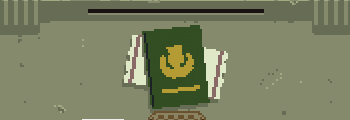

In [172]:
resume()
docs = received_docs()
docs

In [173]:
resume()
received_docs_type()

Oh no! Documents are not always handed in the same rotation!

In [47]:
def moveTo(x, y):
    global offset
    pyautogui.moveTo(offset[0]+x, offset[1]+y)

def dragTo(x, y, button='left', duration=0.4):
    global offset
    pyautogui.dragTo(offset[0]+x, offset[1]+y, button=button, duration=duration)

def open_doc():
    moveTo(251, 547)
    dragTo(815, 468)

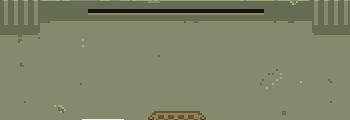

In [48]:
resume()
empty = received_docs()
empty

In [54]:
empty.save('anchors/nodocs.png')

In [48]:
def screenshot(x1, y1, x2, y2):
    global offset
    return pyautogui.screenshot(region=(offset[0]+x1, offset[1]+y1, x2 - x1, y2 - y1))

def receive_all_documents():
    im = received_docs()
    im2 = Image.open('anchors/nodocs.png')
    counter = 0
    documents_screenshots = []
    while not (np.array(im) == np.array(im2)).all():
        open_doc()
        documents_screenshots.append(screenshot(430, 265, 1204, 682))
        counter += 1
        if counter > 5:
            raise Exception('too many documents')
        im = received_docs()
    return documents_screenshots

In [49]:
resume()
receive_all_documents()

[<PIL.Image.Image image mode=RGB size=774x417 at 0x7FF49A4092B0>,
 <PIL.Image.Image image mode=RGB size=774x417 at 0x7FF49A475A58>]

In [104]:
resume()
im = screenshot(680, 437, 810, 454)
im

In [105]:
im.save('anchors/entry_visa.png')

In [50]:
resume()
im = pyautogui.screenshot()
im2 = Image.open('anchors/entry_visa.png')
result = cv2.matchTemplate(np.array(im2), np.array(im), cv2.TM_CCOEFF_NORMED)
_, max_val, _, max_loc = cv2.minMaxLoc(result)
max_val, max_loc

(0.999999463558197, (252, 851))

In [51]:
def put_document_away():
    moveTo(815, 468)
    dragTo(180, 547) # needs to overshoot because it is dropped early

In [52]:
def find_entry_visa():
    im = pyautogui.screenshot()
    im2 = Image.open('anchors/entry_visa.png')
    result = cv2.matchTemplate(np.array(im2), np.array(im), cv2.TM_CCOEFF_NORMED)
    _, max_val, _, max_loc = cv2.minMaxLoc(result)
    if max_val > 0.999:
        return max_loc[0] - offset[0], max_loc[1] - offset[1]
    return None

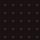

In [18]:
resume()
im = screenshot(815, 468, 855, 508)
im

In [19]:
im.save('anchors/nodoc_right.png')

In [53]:
def return_documents():
    counter = 0
    im = screenshot(815, 468, 855, 508)
    im2 = Image.open('anchors/nodoc_right.png')
    while not (np.array(im) == np.array(im2)).all():
        if counter > 10:
            raise Exception()
        counter += 1
        moveTo(815, 468)
        dragTo(221, 391)
        im = screenshot(815, 468, 855, 508)

    im = received_docs()
    im2 = Image.open('anchors/nodocs.png')
    counter = 0
    while not (np.array(im) == np.array(im2)).all():
        if counter > 10:
            raise Exception()
        counter += 1
        moveTo(251, 547)
        dragTo(221, 391)
        im = received_docs()

In [54]:
def accept():
    counter = 0
    while True:
        counter += 1
        if counter == 10:
            raise Exception('failed to find entry visa')

        entry_visa = find_entry_visa()
        if entry_visa is None:
            put_document_away()
            continue
        moveTo(*entry_visa)
        dragTo(1038, 395)
        pyautogui.press('tab')
        sleep(0.5)
        click(1038, 395)
        moveTo(1038, 455)
        pyautogui.press('tab')
        dragTo(221, 391)
        return_documents()
        break


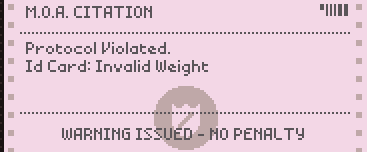

In [58]:
resume()
accept()
sleep(5)
screenshot(627, 494, 994, 646)

In [74]:
find_origin_coordinates()
offset = max_loc[0] - 600, max_loc[1] - 580
start_game()
look_for_wanted_criminals()
call_next()
docs = receive_all_documents()
accept()
sleep(8)
result = screenshot(627, 494, 994, 646)
docs, result

([<PIL.Image.Image image mode=RGB size=774x417 at 0x7FF49A436390>,
  <PIL.Image.Image image mode=RGB size=774x417 at 0x7FF49A4362B0>,
  <PIL.Image.Image image mode=RGB size=774x417 at 0x7FF49A436438>],
 <PIL.Image.Image image mode=RGB size=367x152 at 0x7FF49A436470>)

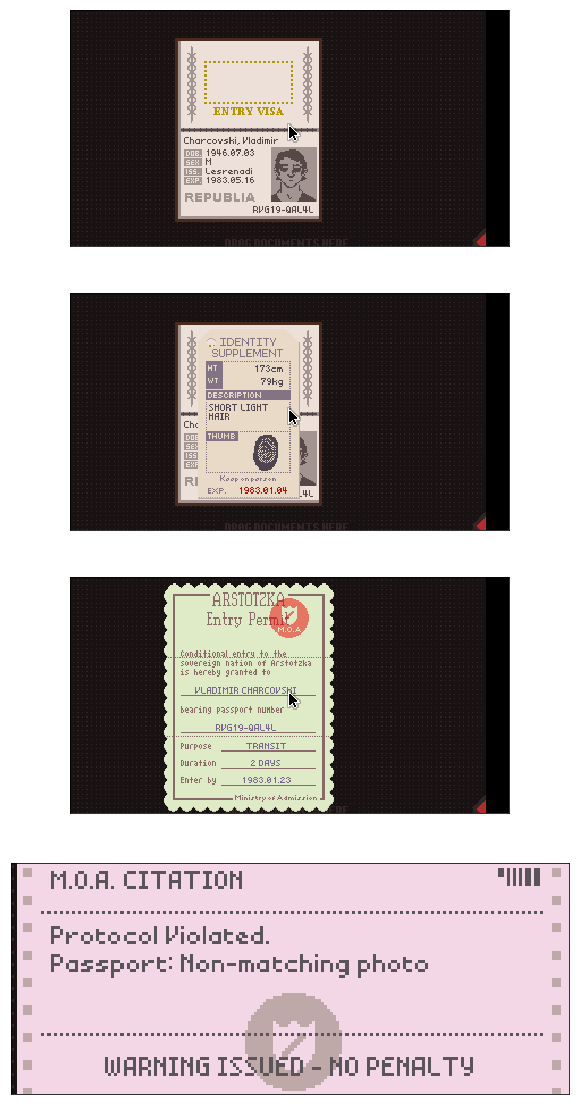

In [83]:
plt.figure(figsize=(10, len(docs)*5+5))
for i, im in enumerate(docs + [result]):
    plt.subplot(len(docs)+1, 1, i+1), plt.yticks([]), plt.xticks([]), plt.imshow(im);